In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display


from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.cluster import DBSCAN

In [3]:
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['figure.dpi'] = 200
plt.rcParams["axes.grid"] = False

In [4]:
%store -r pakistan_2021

In [5]:
pakistan_2021

,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
18,18,Asif Ali (PAK),2,2,0,21,19,10.50,34,61.76,...,-,-,-,-,-,-,-,-,1,0
22,22,Babar Azam (PAK),6,6,0,405,158,67.50,375,108.00,...,-,-,-,-,-,-,-,-,3,0
65,65,Danish Aziz (PAK),2,2,0,12,9,6.00,20,60.00,...,27,0,-,-,5.40,-,0,0,0,0
83,83,Faheem Ashraf (PAK),6,6,1,33,11,6.60,49,67.34,...,229,2,1/25,114.50,5.72,120.0,0,0,3,0
84,84,Fakhar Zaman (PAK),6,6,0,365,193,60.83,397,91.93,...,-,-,-,-,-,-,-,-,2,0
104,104,Haris Rauf (PAK),6,4,3,2,1*,2.00,12,16.66,...,318,13,4/65,24.46,6.23,23.5,1,0,2,0
105,105,Hasan Ali (PAK),4,4,1,73,32*,24.33,39,187.17,...,229,7,5/51,32.71,7.08,27.7,0,1,0,0
120,120,Imam-ul-Haq (PAK),6,6,0,189,70,31.50,239,79.07,...,-,-,-,-,-,-,-,-,0,0
191,191,Mohammad Hasnain (PAK),2,1,1,12,12*,-,5,240.00,...,126,2,1/52,63.00,6.30,60.0,0,0,0,0
196,196,Mohammad Nawaz (PAK),1,1,0,4,4,4.00,10,40.00,...,34,3,3/34,11.33,4.85,14.0,0,0,0,0


In [6]:
pakistan_2021=pakistan_2021.reset_index()

In [7]:
pakistan_2021

,index,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,18,18,Asif Ali (PAK),2,2,0,21,19,10.50,34,...,-,-,-,-,-,-,-,-,1,0
1,22,22,Babar Azam (PAK),6,6,0,405,158,67.50,375,...,-,-,-,-,-,-,-,-,3,0
2,65,65,Danish Aziz (PAK),2,2,0,12,9,6.00,20,...,27,0,-,-,5.40,-,0,0,0,0
3,83,83,Faheem Ashraf (PAK),6,6,1,33,11,6.60,49,...,229,2,1/25,114.50,5.72,120.0,0,0,3,0
4,84,84,Fakhar Zaman (PAK),6,6,0,365,193,60.83,397,...,-,-,-,-,-,-,-,-,2,0
5,104,104,Haris Rauf (PAK),6,4,3,2,1*,2.00,12,...,318,13,4/65,24.46,6.23,23.5,1,0,2,0
6,105,105,Hasan Ali (PAK),4,4,1,73,32*,24.33,39,...,229,7,5/51,32.71,7.08,27.7,0,1,0,0
7,120,120,Imam-ul-Haq (PAK),6,6,0,189,70,31.50,239,...,-,-,-,-,-,-,-,-,0,0
8,191,191,Mohammad Hasnain (PAK),2,1,1,12,12*,-,5,...,126,2,1/52,63.00,6.30,60.0,0,0,0,0
9,196,196,Mohammad Nawaz (PAK),1,1,0,4,4,4.00,10,...,34,3,3/34,11.33,4.85,14.0,0,0,0,0


In [8]:
pakistan_2021.drop(['index','Unnamed: 0_x'],inplace=True,axis=1)

In [9]:
pakistan_2021

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,Asif Ali (PAK),2,2,0,21,19,10.50,34,61.76,0,...,-,-,-,-,-,-,-,-,1,0
1,Babar Azam (PAK),6,6,0,405,158,67.50,375,108.00,2,...,-,-,-,-,-,-,-,-,3,0
2,Danish Aziz (PAK),2,2,0,12,9,6.00,20,60.00,0,...,27,0,-,-,5.40,-,0,0,0,0
3,Faheem Ashraf (PAK),6,6,1,33,11,6.60,49,67.34,0,...,229,2,1/25,114.50,5.72,120.0,0,0,3,0
4,Fakhar Zaman (PAK),6,6,0,365,193,60.83,397,91.93,2,...,-,-,-,-,-,-,-,-,2,0
5,Haris Rauf (PAK),6,4,3,2,1*,2.00,12,16.66,0,...,318,13,4/65,24.46,6.23,23.5,1,0,2,0
6,Hasan Ali (PAK),4,4,1,73,32*,24.33,39,187.17,0,...,229,7,5/51,32.71,7.08,27.7,0,1,0,0
7,Imam-ul-Haq (PAK),6,6,0,189,70,31.50,239,79.07,0,...,-,-,-,-,-,-,-,-,0,0
8,Mohammad Hasnain (PAK),2,1,1,12,12*,-,5,240.00,0,...,126,2,1/52,63.00,6.30,60.0,0,0,0,0
9,Mohammad Nawaz (PAK),1,1,0,4,4,4.00,10,40.00,0,...,34,3,3/34,11.33,4.85,14.0,0,0,0,0


In [10]:
pakistan_2021_players =pakistan_2021.copy()

In [11]:
pakistan_2021_players.drop('Player',axis=1,inplace=True)

In [12]:
pakistan_2021_players.HS=pakistan_2021_players.HS.str.extract('(\d+)')
pakistan_2021_players['HS'].fillna(value=0, inplace=True)


In [13]:
pakistan_2021_players

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,2,2,0,21,19,10.50,34,61.76,0,0,...,-,-,-,-,-,-,-,-,1,0
1,6,6,0,405,158,67.50,375,108.00,2,1,...,-,-,-,-,-,-,-,-,3,0
2,2,2,0,12,9,6.00,20,60.00,0,0,...,27,0,-,-,5.40,-,0,0,0,0
3,6,6,1,33,11,6.60,49,67.34,0,0,...,229,2,1/25,114.50,5.72,120.0,0,0,3,0
4,6,6,0,365,193,60.83,397,91.93,2,0,...,-,-,-,-,-,-,-,-,2,0
5,6,4,3,2,1,2.00,12,16.66,0,0,...,318,13,4/65,24.46,6.23,23.5,1,0,2,0
6,4,4,1,73,32,24.33,39,187.17,0,0,...,229,7,5/51,32.71,7.08,27.7,0,1,0,0
7,6,6,0,189,70,31.50,239,79.07,0,3,...,-,-,-,-,-,-,-,-,0,0
8,2,1,1,12,12,-,5,240.00,0,0,...,126,2,1/52,63.00,6.30,60.0,0,0,0,0
9,1,1,0,4,4,4.00,10,40.00,0,0,...,34,3,3/34,11.33,4.85,14.0,0,0,0,0


In [14]:
pakistan_2021_players.replace("-",0,inplace=True)

In [15]:
pakistan_2021_players.drop('BBI',axis=1,inplace=True)

In [16]:
scaler = StandardScaler()

pakistan_2021_players_scaled = pd.DataFrame(scaler.fit_transform(pakistan_2021_players),columns=pakistan_2021_players.columns)
pakistan_2021_players_scaled.shape
pakistan_2021_players_scaled.head()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,-0.929197,-0.771114,-0.624038,-0.566141,-0.438280,-0.457337,-0.529891,-0.409524,-0.365148,-0.462910,...,-0.518321,-0.800802,-0.660278,-0.804330,-1.174959,-0.801568,-0.25,-0.25,-0.322329,0.0
1,1.045346,1.170951,-0.624038,2.653168,2.157346,2.527303,2.296033,0.424419,2.738613,0.848668,...,-0.518321,-0.800802,-0.660278,-0.804330,-1.174959,-0.801568,-0.25,-0.25,1.047570,0.0
2,-0.929197,-0.771114,-0.624038,-0.641593,-0.625015,-0.692966,-0.645912,-0.441266,-0.365148,-0.462910,...,-0.518321,-0.573487,-0.660278,-0.804330,0.688573,-0.801568,-0.25,-0.25,-1.007279,0.0
3,1.045346,1.170951,0.554700,-0.465537,-0.587668,-0.661549,-0.405584,-0.308888,-0.365148,-0.462910,...,-0.518321,1.127164,-0.099042,2.661751,0.799005,2.711211,-0.25,-0.25,1.047570,0.0
4,1.045346,1.170951,-0.624038,2.317824,2.810920,2.178048,2.478351,0.134595,2.738613,-0.462910,...,-0.518321,-0.800802,-0.660278,-0.804330,-1.174959,-0.801568,-0.25,-0.25,0.362620,0.0


In [17]:
pakistan_2021_players_scaled.describe()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
count,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,...,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,17.000000,1.700000e+01,1.700000e+01,1.700000e+01,17.0
mean,1.306145e-17,-2.612289e-17,-1.306145e-17,-3.265362e-17,3.265362e-17,-3.918434e-17,-1.959217e-17,-3.918434e-17,-3.265362e-17,-8.489941e-17,...,-7.836868e-17,-5.551115e-17,-7.836868e-17,5.877651e-17,1.110223e-16,0.000000,1.632681e-18,1.632681e-18,-8.489941e-17,0.0
std,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00,...,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00,1.030776,1.030776e+00,1.030776e+00,1.030776e+00,0.0
min,-1.422832e+00,-1.742146e+00,-6.240377e-01,-7.421967e-01,-7.930772e-01,-1.007139e+00,-8.116551e-01,-1.523373e+00,-3.651484e-01,-4.629100e-01,...,-5.183211e-01,-8.008017e-01,-6.602782e-01,-8.043303e-01,-1.174959e+00,-0.801568,-2.500000e-01,-2.500000e-01,-1.007279e+00,0.0
25%,-9.291966e-01,-7.711139e-01,-6.240377e-01,-6.415933e-01,-5.876680e-01,-6.929662e-01,-7.039219e-01,-4.412661e-01,-3.651484e-01,-4.629100e-01,...,-5.183211e-01,-8.008017e-01,-6.602782e-01,-8.043303e-01,-1.174959e+00,-0.801568,-2.500000e-01,-2.500000e-01,-1.007279e+00,0.0
50%,5.807479e-02,1.999184e-01,-6.240377e-01,-4.487701e-01,-4.382795e-01,-3.264315e-01,-4.055838e-01,-9.733656e-02,-3.651484e-01,-4.629100e-01,...,-5.183211e-01,-5.145534e-01,-3.796600e-01,-4.613547e-01,4.987688e-01,-0.391744,-2.500000e-01,-2.500000e-01,-3.223292e-01,0.0
75%,1.045346e+00,1.170951e+00,5.547002e-01,7.101417e-02,2.526423e-01,2.668311e-01,1.579437e-01,2.152119e-01,-3.651484e-01,-4.629100e-01,...,-5.183211e-01,1.127164e+00,1.815765e-01,4.479997e-01,8.783772e-01,0.574270,-2.500000e-01,-2.500000e-01,1.047570e+00,0.0
max,1.045346e+00,1.170951e+00,2.912176e+00,2.653168e+00,2.810920e+00,2.527303e+00,2.478351e+00,2.805054e+00,2.738613e+00,3.471825e+00,...,2.418832e+00,1.985909e+00,2.987759e+00,2.661751e+00,1.268338e+00,2.711211,4.000000e+00,4.000000e+00,2.417469e+00,0.0


In [18]:
X =  pakistan_2021_players_scaled.iloc[:,:].values

In [19]:
X

array([[-0.92919665, -0.7711139 , -0.62403772, -0.56614075, -0.43827951,
        -0.45733677, -0.52989135, -0.40952434, -0.36514837, -0.46291005,
        -0.64549722, -0.50828292, -0.5636994 , -1.51873833, -0.92919665,
        -0.91146543, -0.8208483 , -0.51832106, -0.80080166, -0.6602782 ,
        -0.80433026, -1.17495886, -0.8015679 , -0.25      , -0.25      ,
        -0.32232919,  0.        ],
       [ 1.04534623,  1.17095073, -0.62403772,  2.65316834,  2.15734576,
         2.52730309,  2.29603334,  0.42441922,  2.73861279,  0.84866842,
         1.54919334,  3.04062104,  1.40924849, -1.4796785 ,  1.04534623,
        -0.91146543, -0.8208483 , -0.51832106, -0.80080166, -0.6602782 ,
        -0.80433026, -1.17495886, -0.8015679 , -0.25      , -0.25      ,
         1.04756985,  0.        ],
       [-0.92919665, -0.7711139 , -0.62403772, -0.64159331, -0.62501514,
        -0.69296623, -0.64591172, -0.44126614, -0.36514837, -0.46291005,
        -0.64549722, -0.50828292, -0.5636994 , -1.0597

In [20]:
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

'from sklearn.cross_validation import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

In [21]:
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [22]:
np.any(np.isnan(pakistan_2021_players_scaled))

False

In [23]:
pakistan_2021_players_scaled

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,-0.929197,-0.771114,-0.624038,-0.566141,-0.438280,-0.457337,-0.529891,-0.409524,-0.365148,-0.462910,...,-0.518321,-0.800802,-0.660278,-0.804330,-1.174959,-0.801568,-0.25,-0.25,-0.322329,0.0
1,1.045346,1.170951,-0.624038,2.653168,2.157346,2.527303,2.296033,0.424419,2.738613,0.848668,...,-0.518321,-0.800802,-0.660278,-0.804330,-1.174959,-0.801568,-0.25,-0.25,1.047570,0.0
2,-0.929197,-0.771114,-0.624038,-0.641593,-0.625015,-0.692966,-0.645912,-0.441266,-0.365148,-0.462910,...,-0.518321,-0.573487,-0.660278,-0.804330,0.688573,-0.801568,-0.25,-0.25,-1.007279,0.0
3,1.045346,1.170951,0.554700,-0.465537,-0.587668,-0.661549,-0.405584,-0.308888,-0.365148,-0.462910,...,-0.518321,1.127164,-0.099042,2.661751,0.799005,2.711211,-0.25,-0.25,1.047570,0.0
4,1.045346,1.170951,-0.624038,2.317824,2.810920,2.178048,2.478351,0.134595,2.738613,-0.462910,...,-0.518321,-0.800802,-0.660278,-0.804330,-1.174959,-0.801568,-0.25,-0.25,0.362620,0.0
5,1.045346,0.199918,2.912176,-0.725429,-0.774404,-0.902415,-0.712209,-1.222908,-0.365148,-0.462910,...,0.950255,1.876461,2.987759,-0.063891,0.975005,-0.113649,4.00,-0.25,0.362620,0.0
6,0.058075,0.199918,0.554700,-0.130193,-0.195523,0.266831,-0.488456,1.852259,-0.365148,-0.462910,...,-0.518321,1.127164,1.304049,0.185849,1.268338,0.009299,-0.25,4.00,-1.007279,0.0
7,1.045346,1.170951,-0.624038,0.842307,0.514072,0.642267,1.168978,-0.097337,-0.365148,3.471825,...,-0.518321,-0.800802,-0.660278,-0.804330,-1.174959,-0.801568,-0.25,-0.25,-1.007279,0.0
8,-0.929197,-1.256630,0.554700,-0.641593,-0.568994,-1.007139,-0.770219,2.805054,-0.365148,-0.462910,...,2.418832,0.260001,-0.099042,1.102771,0.999162,0.954821,-0.25,-0.25,-1.007279,0.0
9,-1.422832,-1.256630,-0.624038,-0.708662,-0.718383,-0.797690,-0.728783,-0.801968,-0.365148,-0.462910,...,-0.518321,-0.514553,0.181577,-0.461355,0.498769,-0.391744,-0.25,-0.25,-1.007279,0.0


In [24]:
np.all(np.isfinite(pakistan_2021_players_scaled))

True

K:\4th year\my research practical\jupyter\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


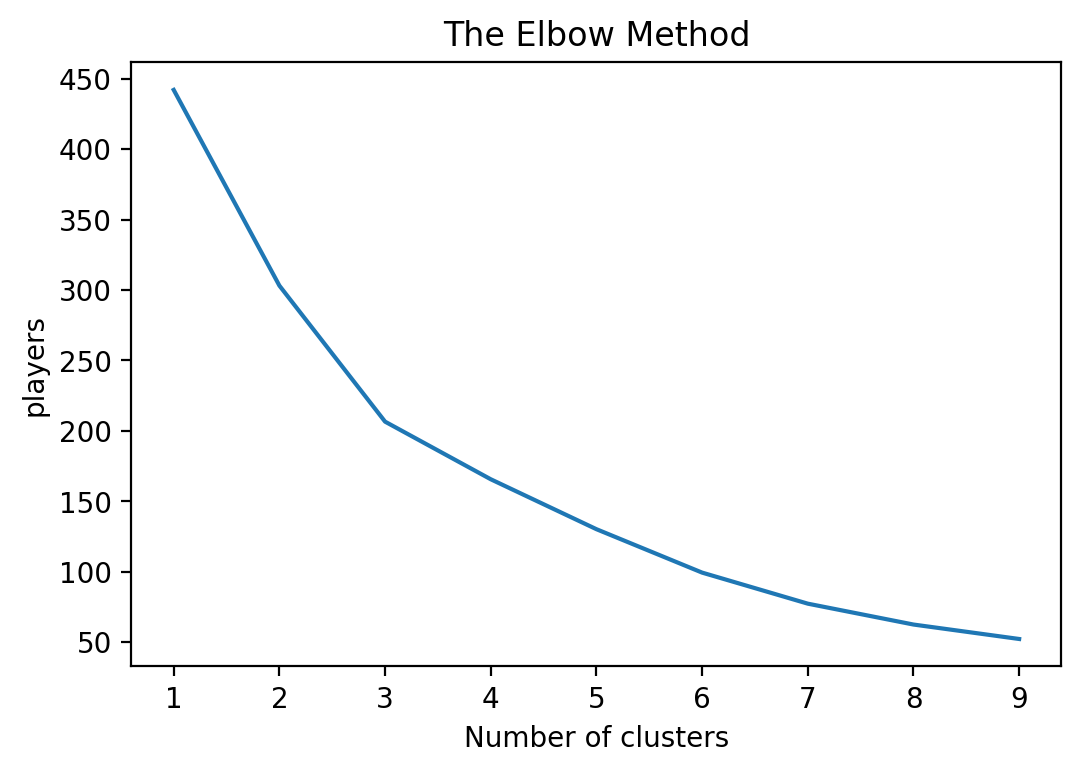

In [25]:
from sklearn.cluster import KMeans
players = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    players.append(kmeans.inertia_)
plt.plot(range(1, 10), players)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('players')
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


In [27]:
y_kmeans

array([0, 2, 0, 1, 2, 1, 1, 2, 0, 0, 2, 0, 0, 1, 1, 0, 0])

In [28]:
kmeans.cluster_centers_

array([[-9.90901111e-01, -9.53182454e-01, -3.29353242e-01,
        -5.61948944e-01, -4.84963419e-01, -4.78085249e-01,
        -5.74434882e-01, -4.50572784e-02, -3.65148372e-01,
        -2.98962741e-01, -6.45497224e-01, -4.98639159e-01,
        -4.58005759e-01,  3.39045122e-01, -9.90901111e-01,
        -4.27249420e-01, -5.00398763e-01, -1.51176974e-01,
        -5.14553447e-01, -4.14737245e-01, -2.01436475e-01,
        -2.75063797e-02, -1.61217605e-01, -2.50000000e-01,
        -2.50000000e-01, -4.93566565e-01,  0.00000000e+00],
       [ 7.49164796e-01,  5.88331342e-01,  1.02619536e+00,
        -3.39783083e-01, -4.38279511e-01, -3.37008654e-01,
        -3.37629022e-01, -6.32862675e-02, -3.65148372e-01,
        -4.62910050e-01,  2.32379001e-01, -4.15702816e-01,
         2.61228947e-18, -1.29816514e-02,  7.49164796e-01,
         1.41277142e+00,  1.45731666e+00,  6.56540003e-01,
         1.46392684e+00,  1.19180215e+00,  9.65762569e-01,
         9.83977296e-01,  8.99202491e-01,  6.00000000e-

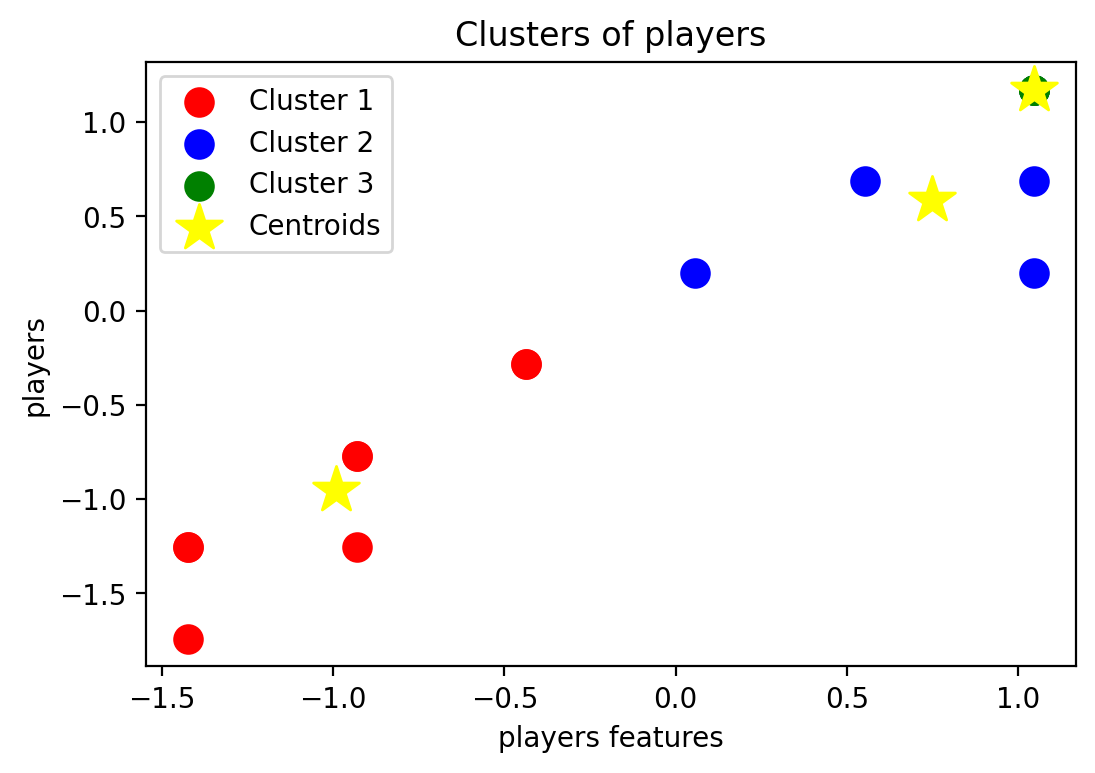

In [29]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300,marker='*', c = 'yellow', label = 'Centroids')
plt.title('Clusters of players')
plt.xlabel('players features')
plt.ylabel('players')
plt.legend()
plt.show()

In [30]:
pakistan_2021

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,Asif Ali (PAK),2,2,0,21,19,10.50,34,61.76,0,...,-,-,-,-,-,-,-,-,1,0
1,Babar Azam (PAK),6,6,0,405,158,67.50,375,108.00,2,...,-,-,-,-,-,-,-,-,3,0
2,Danish Aziz (PAK),2,2,0,12,9,6.00,20,60.00,0,...,27,0,-,-,5.40,-,0,0,0,0
3,Faheem Ashraf (PAK),6,6,1,33,11,6.60,49,67.34,0,...,229,2,1/25,114.50,5.72,120.0,0,0,3,0
4,Fakhar Zaman (PAK),6,6,0,365,193,60.83,397,91.93,2,...,-,-,-,-,-,-,-,-,2,0
5,Haris Rauf (PAK),6,4,3,2,1*,2.00,12,16.66,0,...,318,13,4/65,24.46,6.23,23.5,1,0,2,0
6,Hasan Ali (PAK),4,4,1,73,32*,24.33,39,187.17,0,...,229,7,5/51,32.71,7.08,27.7,0,1,0,0
7,Imam-ul-Haq (PAK),6,6,0,189,70,31.50,239,79.07,0,...,-,-,-,-,-,-,-,-,0,0
8,Mohammad Hasnain (PAK),2,1,1,12,12*,-,5,240.00,0,...,126,2,1/52,63.00,6.30,60.0,0,0,0,0
9,Mohammad Nawaz (PAK),1,1,0,4,4,4.00,10,40.00,0,...,34,3,3/34,11.33,4.85,14.0,0,0,0,0


In [31]:
pakistan_2021["cluster"] = y_kmeans

In [32]:
pakistan_2021

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,Asif Ali (PAK),2,2,0,21,19,10.50,34,61.76,0,...,-,-,-,-,-,-,-,1,0,0
1,Babar Azam (PAK),6,6,0,405,158,67.50,375,108.00,2,...,-,-,-,-,-,-,-,3,0,2
2,Danish Aziz (PAK),2,2,0,12,9,6.00,20,60.00,0,...,0,-,-,5.40,-,0,0,0,0,0
3,Faheem Ashraf (PAK),6,6,1,33,11,6.60,49,67.34,0,...,2,1/25,114.50,5.72,120.0,0,0,3,0,1
4,Fakhar Zaman (PAK),6,6,0,365,193,60.83,397,91.93,2,...,-,-,-,-,-,-,-,2,0,2
5,Haris Rauf (PAK),6,4,3,2,1*,2.00,12,16.66,0,...,13,4/65,24.46,6.23,23.5,1,0,2,0,1
6,Hasan Ali (PAK),4,4,1,73,32*,24.33,39,187.17,0,...,7,5/51,32.71,7.08,27.7,0,1,0,0,1
7,Imam-ul-Haq (PAK),6,6,0,189,70,31.50,239,79.07,0,...,-,-,-,-,-,-,-,0,0,2
8,Mohammad Hasnain (PAK),2,1,1,12,12*,-,5,240.00,0,...,2,1/52,63.00,6.30,60.0,0,0,0,0,0
9,Mohammad Nawaz (PAK),1,1,0,4,4,4.00,10,40.00,0,...,3,3/34,11.33,4.85,14.0,0,0,0,0,0


In [33]:
pakistan_2021['cluster'].value_counts()

0    8
1    5
2    4
Name: cluster, dtype: int64

In [34]:
pakistan_Cluster_2021 = np.array([8,5,4])

In [35]:
pakistan_Cluster_2021

array([8, 5, 4])

In [36]:
%store pakistan_Cluster_2021

Stored 'pakistan_Cluster_2021' (ndarray)


In [37]:
pakistan_2021_players_scaled.insert(0, 'Player', pakistan_2021.Player)

In [38]:
pakistan_2021_players_scaled

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,Asif Ali (PAK),-0.929197,-0.771114,-0.624038,-0.566141,-0.438280,-0.457337,-0.529891,-0.409524,-0.365148,...,-0.518321,-0.800802,-0.660278,-0.804330,-1.174959,-0.801568,-0.25,-0.25,-0.322329,0.0
1,Babar Azam (PAK),1.045346,1.170951,-0.624038,2.653168,2.157346,2.527303,2.296033,0.424419,2.738613,...,-0.518321,-0.800802,-0.660278,-0.804330,-1.174959,-0.801568,-0.25,-0.25,1.047570,0.0
2,Danish Aziz (PAK),-0.929197,-0.771114,-0.624038,-0.641593,-0.625015,-0.692966,-0.645912,-0.441266,-0.365148,...,-0.518321,-0.573487,-0.660278,-0.804330,0.688573,-0.801568,-0.25,-0.25,-1.007279,0.0
3,Faheem Ashraf (PAK),1.045346,1.170951,0.554700,-0.465537,-0.587668,-0.661549,-0.405584,-0.308888,-0.365148,...,-0.518321,1.127164,-0.099042,2.661751,0.799005,2.711211,-0.25,-0.25,1.047570,0.0
4,Fakhar Zaman (PAK),1.045346,1.170951,-0.624038,2.317824,2.810920,2.178048,2.478351,0.134595,2.738613,...,-0.518321,-0.800802,-0.660278,-0.804330,-1.174959,-0.801568,-0.25,-0.25,0.362620,0.0
5,Haris Rauf (PAK),1.045346,0.199918,2.912176,-0.725429,-0.774404,-0.902415,-0.712209,-1.222908,-0.365148,...,0.950255,1.876461,2.987759,-0.063891,0.975005,-0.113649,4.00,-0.25,0.362620,0.0
6,Hasan Ali (PAK),0.058075,0.199918,0.554700,-0.130193,-0.195523,0.266831,-0.488456,1.852259,-0.365148,...,-0.518321,1.127164,1.304049,0.185849,1.268338,0.009299,-0.25,4.00,-1.007279,0.0
7,Imam-ul-Haq (PAK),1.045346,1.170951,-0.624038,0.842307,0.514072,0.642267,1.168978,-0.097337,-0.365148,...,-0.518321,-0.800802,-0.660278,-0.804330,-1.174959,-0.801568,-0.25,-0.25,-1.007279,0.0
8,Mohammad Hasnain (PAK),-0.929197,-1.256630,0.554700,-0.641593,-0.568994,-1.007139,-0.770219,2.805054,-0.365148,...,2.418832,0.260001,-0.099042,1.102771,0.999162,0.954821,-0.25,-0.25,-1.007279,0.0
9,Mohammad Nawaz (PAK),-1.422832,-1.256630,-0.624038,-0.708662,-0.718383,-0.797690,-0.728783,-0.801968,-0.365148,...,-0.518321,-0.514553,0.181577,-0.461355,0.498769,-0.391744,-0.25,-0.25,-1.007279,0.0


In [39]:
pakistan_2021_players_scaled[['Player','Ave_x','Ave_y']]

,Player,Ave_x,Ave_y
0,Asif Ali (PAK),-0.457337,-0.804330
1,Babar Azam (PAK),2.527303,-0.804330
2,Danish Aziz (PAK),-0.692966,-0.804330
3,Faheem Ashraf (PAK),-0.661549,2.661751
4,Fakhar Zaman (PAK),2.178048,-0.804330
5,Haris Rauf (PAK),-0.902415,-0.063891
6,Hasan Ali (PAK),0.266831,0.185849
7,Imam-ul-Haq (PAK),0.642267,-0.804330
8,Mohammad Hasnain (PAK),-1.007139,1.102771
9,Mohammad Nawaz (PAK),-0.797690,-0.461355


In [40]:
pakistan_2021_Ave=pakistan_2021_players_scaled.mean()

In [41]:
pakistan_2021_Ave

Mat_x           1.306145e-17
Inns_x         -2.612289e-17
NO             -1.306145e-17
Runs_x         -3.265362e-17
HS              3.265362e-17
Ave_x          -3.918434e-17
BF             -1.959217e-17
SR_x           -3.918434e-17
100            -3.265362e-17
50             -8.489941e-17
0              -5.224579e-17
4s              4.571507e-17
6s             -1.959217e-17
Unnamed: 0_y    2.612289e-17
Mat_y           1.306145e-17
Inns_y          0.000000e+00
Overs          -3.265362e-17
Mdns           -7.836868e-17
Runs_y         -5.551115e-17
Wkts           -7.836868e-17
Ave_y           5.877651e-17
Econ            1.110223e-16
SR_y            0.000000e+00
4               1.632681e-18
5               1.632681e-18
Ct             -8.489941e-17
St              0.000000e+00
dtype: float64

In [42]:
pakistan_Ave_2021 =pakistan_2021_Ave[['Ave_x','Ave_y']]

In [43]:
pakistan_Ave_2021

Ave_x   -3.918434e-17
Ave_y    5.877651e-17
dtype: float64

In [44]:
pakistan_Ave_2021 = np.array([pakistan_Ave_2021.Ave_x, pakistan_Ave_2021.Ave_y])

In [45]:
pakistan_Ave_2021

array([-3.91843420e-17,  5.87765131e-17])

In [46]:
%store pakistan_Ave_2021

Stored 'pakistan_Ave_2021' (ndarray)


In [47]:
pakistan_2021

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,Asif Ali (PAK),2,2,0,21,19,10.50,34,61.76,0,...,-,-,-,-,-,-,-,1,0,0
1,Babar Azam (PAK),6,6,0,405,158,67.50,375,108.00,2,...,-,-,-,-,-,-,-,3,0,2
2,Danish Aziz (PAK),2,2,0,12,9,6.00,20,60.00,0,...,0,-,-,5.40,-,0,0,0,0,0
3,Faheem Ashraf (PAK),6,6,1,33,11,6.60,49,67.34,0,...,2,1/25,114.50,5.72,120.0,0,0,3,0,1
4,Fakhar Zaman (PAK),6,6,0,365,193,60.83,397,91.93,2,...,-,-,-,-,-,-,-,2,0,2
5,Haris Rauf (PAK),6,4,3,2,1*,2.00,12,16.66,0,...,13,4/65,24.46,6.23,23.5,1,0,2,0,1
6,Hasan Ali (PAK),4,4,1,73,32*,24.33,39,187.17,0,...,7,5/51,32.71,7.08,27.7,0,1,0,0,1
7,Imam-ul-Haq (PAK),6,6,0,189,70,31.50,239,79.07,0,...,-,-,-,-,-,-,-,0,0,2
8,Mohammad Hasnain (PAK),2,1,1,12,12*,-,5,240.00,0,...,2,1/52,63.00,6.30,60.0,0,0,0,0,0
9,Mohammad Nawaz (PAK),1,1,0,4,4,4.00,10,40.00,0,...,3,3/34,11.33,4.85,14.0,0,0,0,0,0
